In [3]:
import pandas as pd
df = pd.read_csv('train.csv')

## Visualization
Now that we learned how pandas data selection works, let us investigate the different features visually. For that we use the Python package `matplotlib`, which provides versatile visualization capabilities. Luckily, pandas wraps calls to matplotlib neatly and has a great [documentation](https://pandas.pydata.org/docs/user_guide/visualization.html) about it.

Let us start by visualizing the tabular data we retrieved above. A handy way to do this is by using boxplots. Let us first make some configurations to make the plots look beautiful in jupyter and then actually plot the boxes.

In [4]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
# Change default size of figures:
plt.rcParams["figure.figsize"] = (12,7)

Now let us do a box plot by simply selecting a columns and call [`.plot.box()`](https://pandas.pydata.org/docs/user_guide/visualization.html#box-plots) on it.

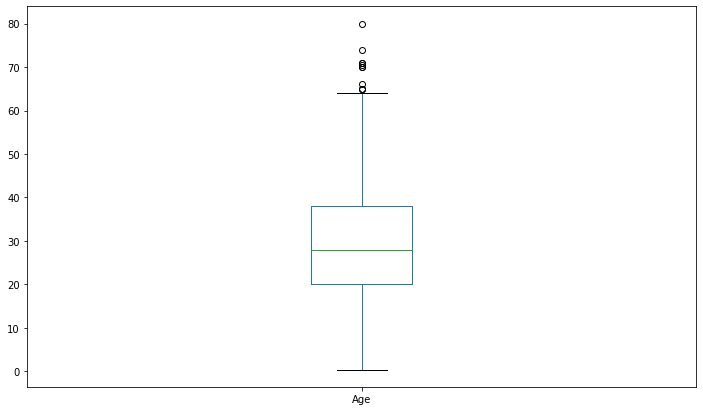

In [5]:
ax = df["Age"].plot.box()

A box plot can be handy to see the distribution over one variable. It gives us the following information:

- The lower line indicates the 1% quartile, that is the value at or below which 1% of the data lie.
- The lower boundry of the box indicates the 25% quartile.
- The green line indicates the average
- The upper boundry of the box indicates the 75% quartile.
- The upper line indicates the 99% quartile.
- The dots above this line are individual values that are higher than the 99% quartile They are often consider outliers.


We however, want to see how variables relate to our target, did the person survive or not. For that alpha blended histogramms or stacked bar charts come in handy. But pandas provides way more options to plot data, e.g. [histograms](https://pandas.pydata.org/docs/user_guide/visualization.html#histograms).

To try this, first plot a histogramm for one of the columns. Then (in a new cell) plot two of them when by filtering for all survivours and one for all others.

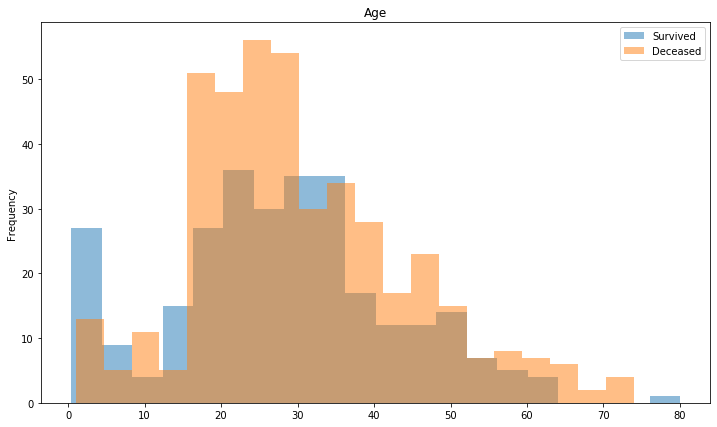

In [6]:
plt.title("Age")
df.loc[df["Survived"] == True, "Age"].plot.hist(alpha=0.5, label="Survived", bins=20)
df.loc[df["Survived"] == False, "Age"].plot.hist(alpha=0.5, label="Deceased", bins=20)
plt.legend()

If you have categorical values, stacked bar charts might be the right way to go.

For this, we unluckily have to transform our data a bit. This can be done using grouping. Pandas essentially allows you to split your dataframe up into multiple once. Each one having the same values over one or multiple columns.

Let us [group them by](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups) the column we want to plot (e.g. `"Pclass"`) and the target `"Survived"`.

In [28]:
grouped = df.groupby(["Pclass", "Survived"])
grouped.groups

{(1,
  0): Int64Index([  6,  27,  30,  34,  35,  54,  62,  64,  83,  92,  96, 102, 110,
             118, 124, 137, 139, 155, 168, 170, 174, 177, 185, 245, 252, 262,
             263, 270, 273, 284, 295, 297, 331, 332, 336, 339, 351, 373, 377,
             434, 438, 452, 456, 462, 467, 475, 487, 492, 493, 498, 505, 515,
             527, 536, 544, 545, 555, 557, 583, 602, 625, 633, 659, 662, 671,
             694, 698, 711, 741, 745, 748, 766, 782, 789, 793, 806, 815, 822,
             867, 872],
            dtype='int64'),
 (1,
  1): Int64Index([  1,   3,  11,  23,  31,  52,  55,  61,  88,  97,
             ...
             842, 849, 853, 856, 857, 862, 871, 879, 887, 889],
            dtype='int64', length=136),
 (2,
  0): Int64Index([ 20,  33,  41,  70,  72,  99, 117, 120, 122, 134, 135, 144, 145,
             148, 149, 150, 178, 181, 191, 199, 213, 217, 219, 221, 228, 232,
             234, 236, 238, 239, 242, 249, 265, 277, 292, 308, 312, 314, 317,
             342, 343, 344, 357,

In [29]:
grouped.get_group((1,0))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S


Now, we count the occurence of the `"Pclass"` for each combindation:

In [30]:
pclass_counts = grouped["Pclass"].count()
pclass_counts

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

Finally we move the `"Survived"` index to a new column:

In [31]:
pclass_counts = pclass_counts.unstack("Survived")
pclass_counts

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


This we can then plot:

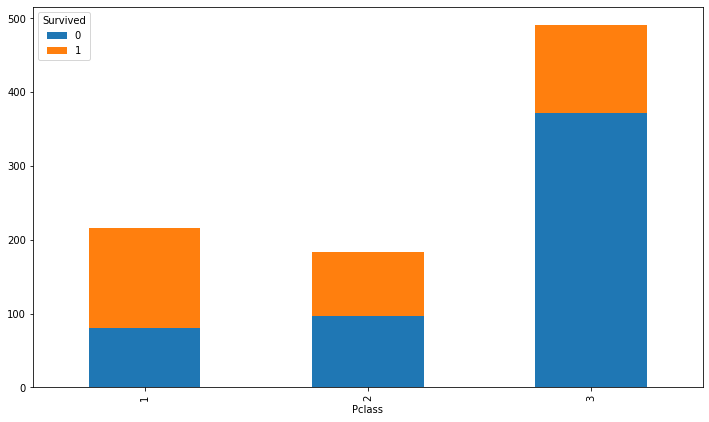

In [32]:
pclass_counts.plot.bar(stacked=True)

For convenience reasons we should wrap this into a function:

In [33]:
def make_stacked_bar_chart(df: pd.DataFrame, x_axis: str, stack_dimension: str):
    bar_dataframe = df.groupby([x_axis, stack_dimension])[x_axis].count().unstack(stack_dimension).fillna(0)
    bar_dataframe.plot.bar(stacked = True)
    plt.legend()

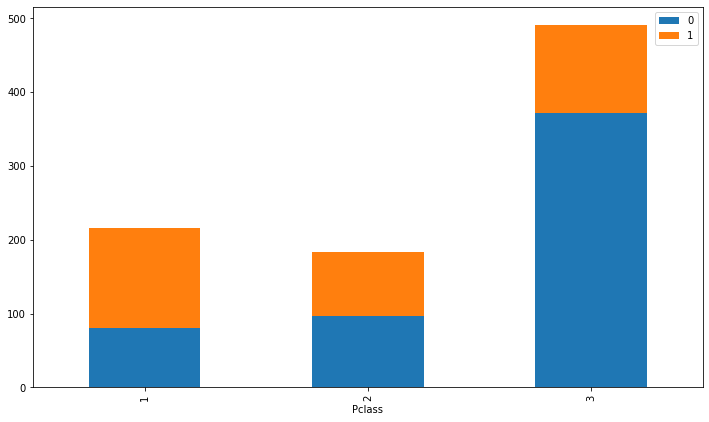

In [34]:
make_stacked_bar_chart(df, "Pclass", "Survived")

Given these two option, investigate the remaining columns (`["Fare", "SibSp", "Parch"]`).

To already get an intuition in how the data correlate with our target, let us as well look at the correlation matrix and its plut using df.corr() (Add link here):

In [77]:
df[[*numeric_features, "Survived"]].corr()

,Pclass,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.338481
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,-0.338481,-0.077221,-0.035322,0.081629,0.257307,1.000000


Now that we have an intuition for our data, let us continue by [training a machine learning algorithm](./03-SklearnIntroduction.ipynb) with them.